# Data Science Salaries - Adityo Pangestu



Instalasi Library yang akan digunakan

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

Import dataset yang akan dipakai

In [13]:
df = pd.read_csv('DataScience_salaries_2024.csv')

## Data Availability Checking

Cek semua baris pada dataset

In [14]:
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [16]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


## Descriptive Statistics

Deskripsi data pada label work_year, salary, salary_in_usd, dan remote_ratio

In [18]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


Cek korelasi antar label

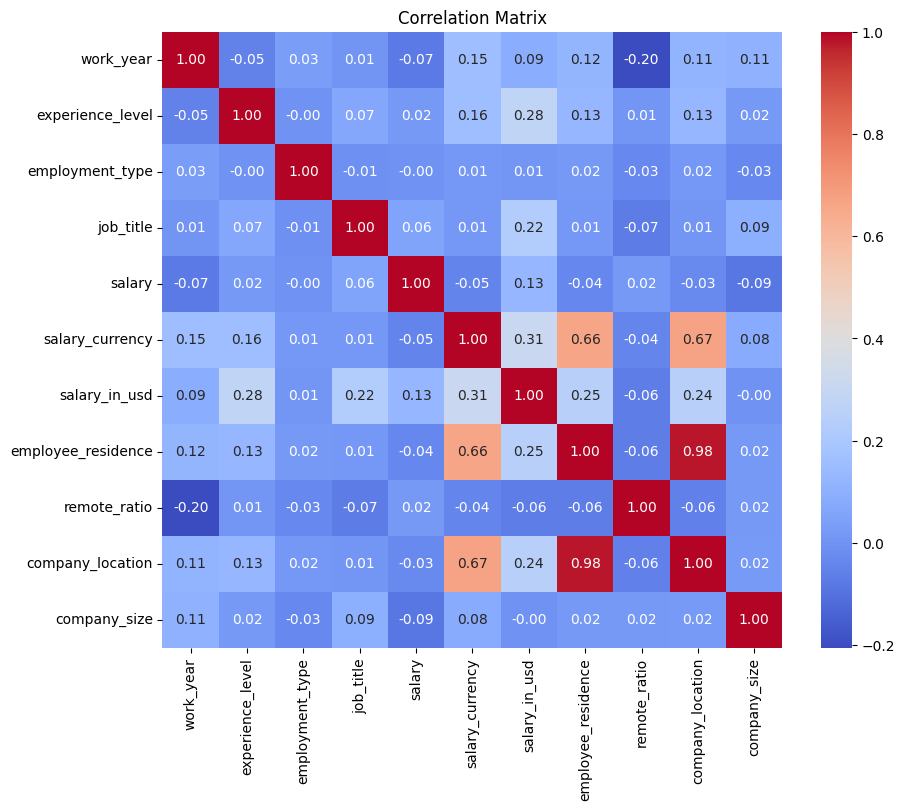

In [19]:
df_ds = df.copy()

columns_to_encode = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

for column in columns_to_encode:
    le = LabelEncoder()
    df_ds[column] = le.fit_transform(df[column])

correlation = df_ds.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## EDA dan Visualization

Korelasi antara work_year dan salary_in_usd
- Tren gaji meningkat setiap tahun

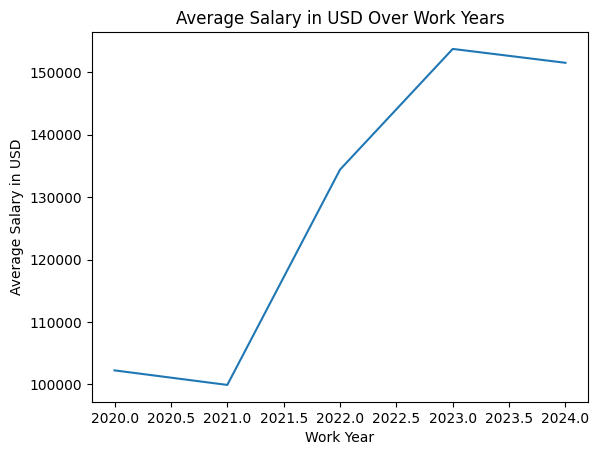

In [49]:
work_year_salary_in_usd = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.lineplot(x='work_year', y='salary_in_usd', data=work_year_salary_in_usd)
plt.title('Average Salary in USD Over Work Years')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.show()

<ipython-input-48-1694b8200a3a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['work_year'], y=df['salary_in_usd'], palette="coolwarm")


Text(0, 0.5, 'Salary (USD)')

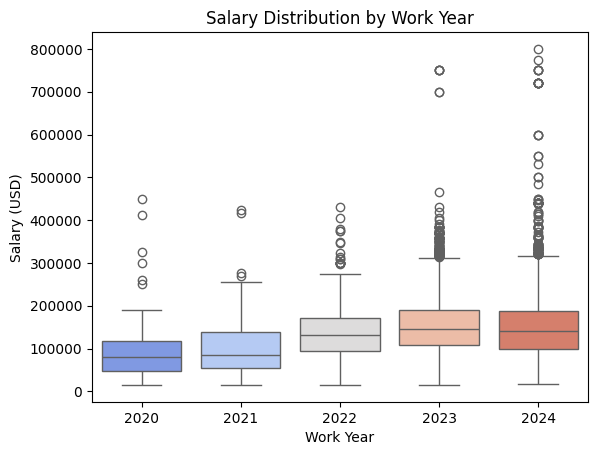

In [48]:
sns.boxplot(x=df['work_year'], y=df['salary_in_usd'], palette="coolwarm")
plt.title('Salary Distribution by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')

Korelasi experience_level dan salary_in_usd
- Rata-rata gaji meningkat seiring dengan pengalaman kerja

<ipython-input-26-e8d1b6d04bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_salary_avg.index, y=experience_salary_avg.values, palette="viridis")


<Axes: xlabel='experience_level'>

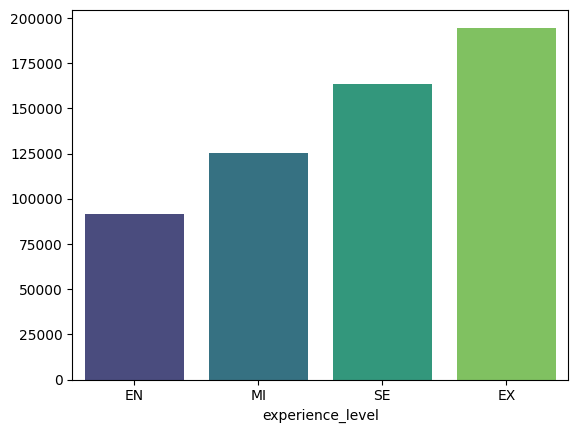

In [26]:
experience_salary_avg = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
sns.barplot(x=experience_salary_avg.index, y=experience_salary_avg.values, palette="viridis")

Korelasi antara job_title dan salary_in_usd
- Jabatan dengan rata-rata gaji tertinggi meliputi posisi seperti Machine Learning Engineer dan Data Scientist

<ipython-input-31-fa47548ade98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary_avg.values, y=job_salary_avg.index, palette="plasma")


Text(0, 0.5, 'Job Title')

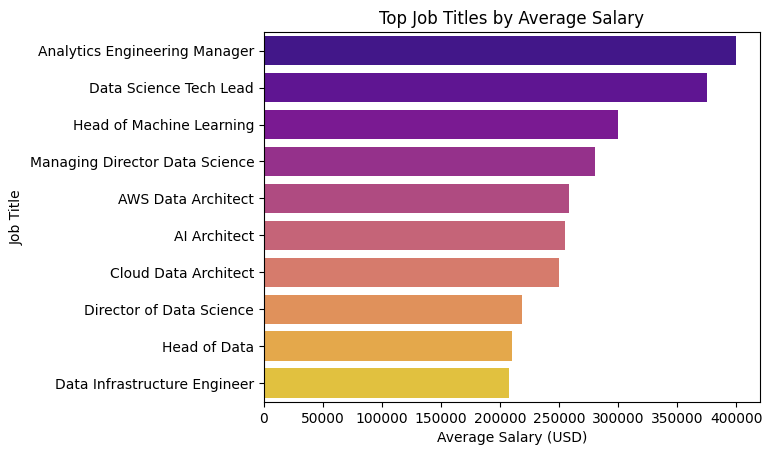

In [31]:
job_salary_avg = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=job_salary_avg.values, y=job_salary_avg.index, palette="plasma")
plt.title('Top Job Titles by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')

Korelasi antara company_size dan salary_in_usd
- Perusahaan menengah (M) memiliki rata-rata gaji lebih tinggi dibandingkan perusahaan kecil (S) dan besar (L).

<ipython-input-35-29cd81038eb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_size_salary_avg.index, y=company_size_salary_avg.values, palette="magma")


Text(0, 0.5, 'Average Salary (USD)')

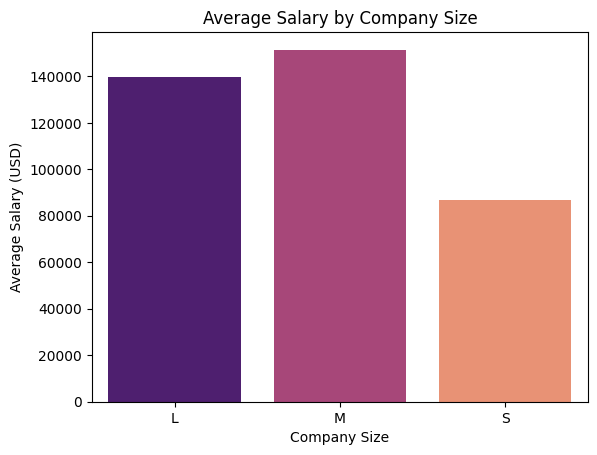

In [35]:
company_size_salary_avg = df.groupby('company_size')['salary_in_usd'].mean()
sns.barplot(x=company_size_salary_avg.index, y=company_size_salary_avg.values, palette="magma")
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')

Korelasi antara employment_type dan salary_in_usd
- Rata-rata gaji tertinggi diduduki oleh Full Time employement_type

<ipython-input-38-2a664cbf7d13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_salary_avg.index, y=employment_salary_avg.values, palette="YlGnBu")


Text(0, 0.5, 'Average Salary (USD)')

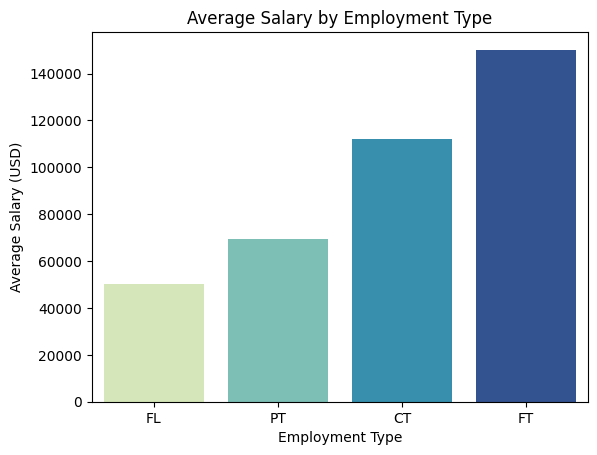

In [38]:
employment_salary_avg = df.groupby('employment_type')['salary_in_usd'].mean().sort_values()
sns.barplot(x=employment_salary_avg.index, y=employment_salary_avg.values, palette="YlGnBu")
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')

Korelasi antara experience_level dan salary_in_usd
- Rata-rata gaji tertinggi diduduki oleh EX experience_level

<ipython-input-39-f6a503b421db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_salary_avg.index, y=experience_salary_avg.values, palette="viridis")


Text(0, 0.5, 'Average Salary (USD)')

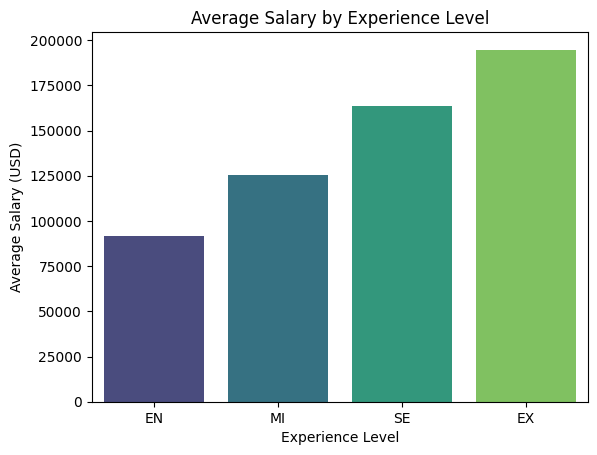

In [39]:
experience_salary_avg = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
sns.barplot(x=experience_salary_avg.index, y=experience_salary_avg.values, palette="viridis")
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')

Korelasi antara company_location dan salary_in_usd
- Rata-rata gaji tertinggi merupakan perusahaan yang berlokasi di QA

<ipython-input-43-ebfe1d4f6e91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_location_salary_avg.index, y=company_location_salary_avg.values, palette="YlOrBr")


Text(0, 0.5, 'Average Salary (USD)')

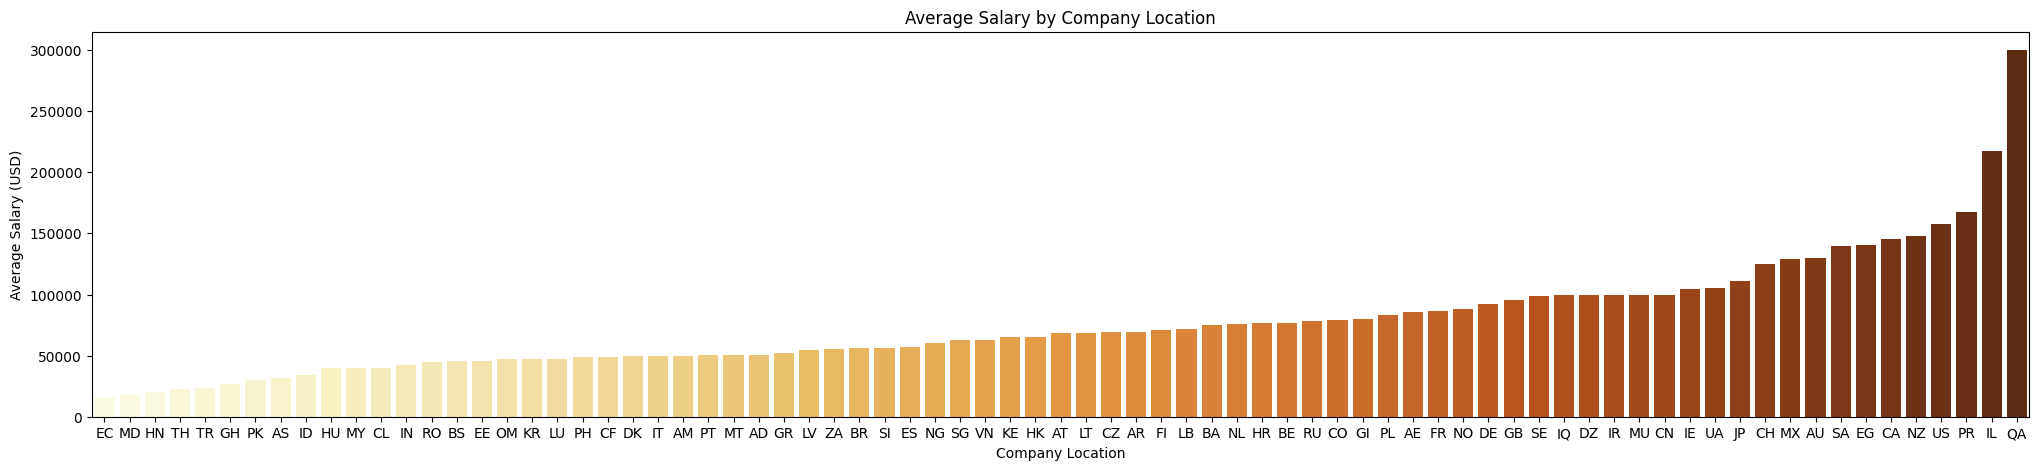

In [43]:
company_location_salary_avg = df.groupby('company_location')['salary_in_usd'].mean().sort_values()
plt.figure(figsize=(25,5))
sns.barplot(x=company_location_salary_avg.index, y=company_location_salary_avg.values, palette="YlOrBr")
plt.title('Average Salary by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')

Korelasi antara remote_ratio dan salary_in_usd
- Rata-rata gaji tertinggi diduduki oleh pegawai yang bekerja di kantor (Onsite)

<ipython-input-45-f6038c360459>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=remote_salary_avg.index, y=remote_salary_avg.values, palette="YlGnBu")


Text(0, 0.5, 'Average Salary (USD)')

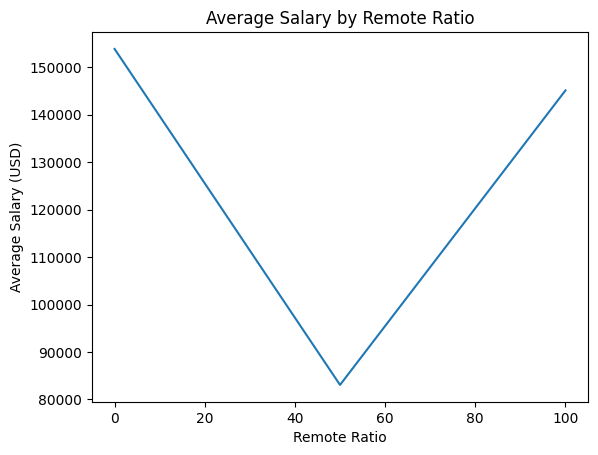

In [45]:
remote_salary_avg = df.groupby('remote_ratio')['salary_in_usd'].mean()
sns.lineplot(x=remote_salary_avg.index, y=remote_salary_avg.values, palette="YlGnBu")
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary (USD)')

## Insight
Banyak sekali hal-hal yang dapat menjadi faktor dalam penentu gaji seseorang. Namun faktor yang paling menentukan gaji seseorang adalah experience_level (pengalaman bekerja).